# Crop Predictiom

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [47]:
label = df.groupby('label')
label.size()

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
dtype: int64

In [48]:
label.get_group('rice')
label.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2100,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
2101,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2102,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
2103,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee


In [49]:
label[['humidity']].mean()

,humidity
label,
apple,92.333383
banana,80.358123
blackgram,65.118426
chickpea,16.860439
coconut,94.844272
coffee,58.869846
cotton,79.843474
grapes,81.875228
jute,79.639864


In [50]:
labels = list(label.mean().index)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [51]:
nitrogen = list(label[['N']].mean().values.ravel())
nitrogen

[np.float64(20.8),
 np.float64(100.23),
 np.float64(40.02),
 np.float64(40.09),
 np.float64(21.98),
 np.float64(101.2),
 np.float64(117.77),
 np.float64(23.18),
 np.float64(78.4),
 np.float64(20.75),
 np.float64(18.77),
 np.float64(77.76),
 np.float64(20.07),
 np.float64(21.44),
 np.float64(20.99),
 np.float64(100.32),
 np.float64(19.58),
 np.float64(49.88),
 np.float64(20.73),
 np.float64(18.87),
 np.float64(79.89),
 np.float64(99.42)]

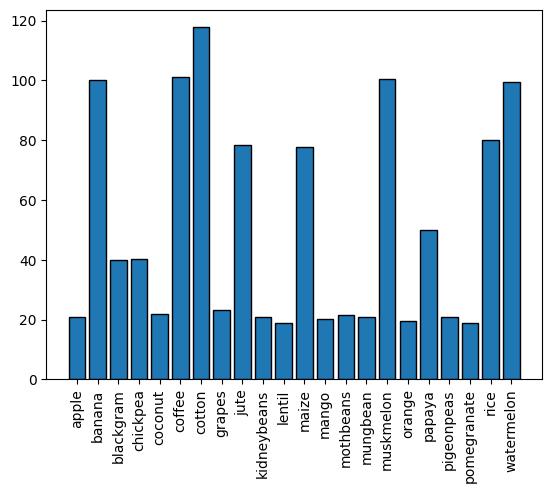

In [52]:
plt.bar(x = labels, height = nitrogen, ec = 'k')
plt.xticks(rotation = 90)
plt.show()

In [53]:
x = df.drop('label', axis = 1)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_transformed = sc.fit_transform(x)
x_transformed.shape 

(2200, 7)

In [55]:
desc = pd.DataFrame(x_transformed).describe()
desc

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01
50%,-3.671690e-01,-7.164472e-02,-3.189225e-01,-3.466729e-03,4.039475e-01,-5.742697e-02,-1.564454e-01
75%,9.130086e-01,4.438444e-01,1.680429e-02,5.817982e-01,8.296508e-01,5.869540e-01,3.786243e-01
max,2.423483e+00,2.778707e+00,3.097591e+00,3.567190e+00,1.280400e+00,4.478912e+00,3.550701e+00


In [56]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [57]:
desc_formatted = desc.applymap(lambda x: f"{int(x):d}")
desc_formatted

C:\Users\hites\AppData\Local\Temp\ipykernel_13076\2167129568.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formatted = desc.applymap(lambda x: f"{int(x):d}")


,0,1,2,3,4,5,6
count,2200,2200,2200,2200,2200,2200,2200
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1
min,-1,-1,0,-3,-2,-3,-1
25%,0,0,0,0,0,0,0
50%,0,0,0,0,0,0,0
75%,0,0,0,0,0,0,0
max,2,2,3,3,1,4,3


In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(x_transformed)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [59]:
label = kmeans.labels_

In [60]:
df['cluster_8'] = label

In [61]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_8
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,6
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,6
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,6
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,6
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,6
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,6
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,1
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,6
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,1


In [62]:
df['cluster_8'].value_counts()

cluster_8
1    525
4    428
6    336
0    287
2    200
7    184
3    145
5     95
Name: count, dtype: int64

In [63]:
df[df['label'] == 'rice']['cluster_8'].value_counts()

cluster_8
6    100
Name: count, dtype: int64

In [71]:
df[df['cluster_8'] == 1]['label'].value_counts()

label
banana        100
watermelon    100
muskmelon     100
cotton        100
maize          97
coffee         20
papaya          8
Name: count, dtype: int64

In [72]:
from sklearn.metrics import silhouette_score
silhouette_score(x_transformed, label)

0.33780353291385357

In [73]:
kmeans.inertia_

4879.432123597771

In [75]:
wcss = {}

for i in range(5,51):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_transformed)
    wcss[i] = kmeans.inertia_

In [76]:
wcss

{5: 6933.64993650865,
 6: 6127.3430051850155,
 7: 5248.724125054856,
 8: 4970.36570577268,
 9: 4598.525653553279,
 10: 4282.206453415392,
 11: 3888.6876610784993,
 12: 4080.8186944047648,
 13: 3545.2938720474913,
 14: 3252.7419596872815,
 15: 3073.5018389050765,
 16: 3137.6799567258718,
 17: 2767.334259116849,
 18: 2652.6953509683826,
 19: 2513.7063048082027,
 20: 2509.240442242648,
 21: 2306.648441983706,
 22: 2247.2704155465726,
 23: 2175.573177494574,
 24: 2083.212561976309,
 25: 2030.8861618383412,
 26: 1994.009168457693,
 27: 1974.8184201657373,
 28: 1827.8743690745796,
 29: 1839.4294009528826,
 30: 1806.798309118303,
 31: 1758.9280987734105,
 32: 1713.0677572549644,
 33: 1704.6715195457268,
 34: 1614.110595913778,
 35: 1556.8873466548785,
 36: 1548.5307107365852,
 37: 1487.033099765958,
 38: 1533.920784291975,
 39: 1484.8736724503722,
 40: 1415.9055374063132,
 41: 1450.1127209453966,
 42: 1391.8973836734006,
 43: 1407.5576161573215,
 44: 1363.890337707625,
 45: 1313.571099547918,

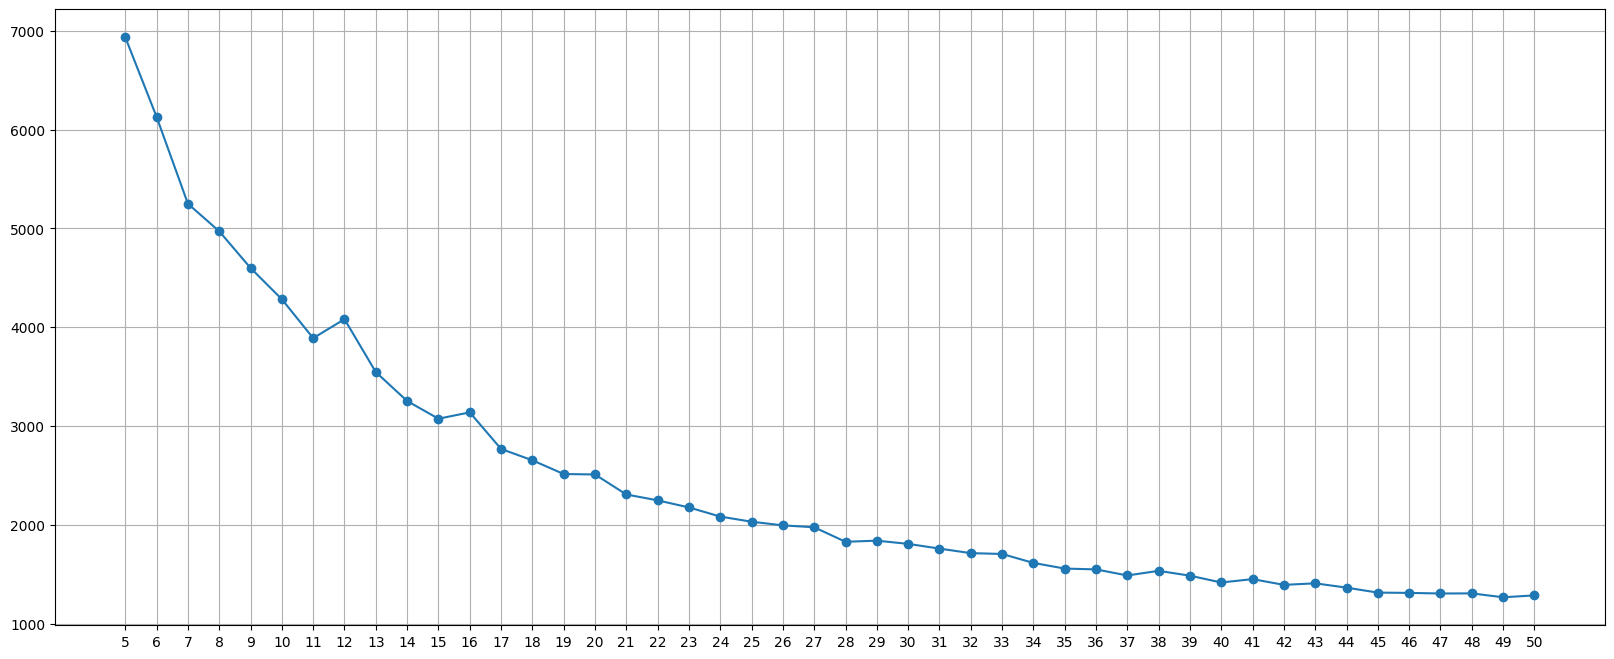

In [78]:
plt.figure(figsize = (20,8))
plt.plot(wcss.keys(), wcss.values(), marker = 'o')
plt.xticks(list(wcss.keys()))
plt.grid(True)
plt.show()

In [79]:
import joblib 

joblib.dump(kmeans, 'crop_recommendation_model.lb')

joblib.dump(sc, 'scaler.lb')

joblib.dump(df, 'crop_recommendation_data.lb')

['crop_recommendation_data.lb']